# Quant Trading Strategies HW 4 - Madison Rusch (12365298)
## Accumulation Algorithm

## Data

In [276]:
import pandas as pd
import datetime as dt
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt 

class TradingPair(Enum):
    BTC_USD = 1,
    ETH_BTC = 2,
    ETH_USD = 3

book_BTC_USD_2021 = pd.read_table("../data/book_narrow_BTC-USD_2021.delim.gz",compression='gzip',sep='\t')
book_ETH_BTC_2021 = pd.read_table("../data/book_narrow_ETH-BTC_2021.delim.gz",compression='gzip',sep='\t')
book_ETH_USD_2021 = pd.read_table("../data/book_narrow_ETH-USD_2021.delim.gz",compression='gzip',sep='\t')

In [277]:
display(book_BTC_USD_2021)

,Ask1PriceMillionths,Bid1PriceMillionths,Ask1SizeBillionths,Bid1SizeBillionths,Ask2PriceMillionths,Bid2PriceMillionths,Ask2SizeBillionths,Bid2SizeBillionths,received_utc_nanoseconds,timestamp_utc_nanoseconds,Mid
0,61618460000,61618450000,324097110,14820000,61620160000,61614780000,22294260,1100000000,1618561355545336000,1618561355590991000,6.161846e+10
1,61618460000,61618450000,324097110,14820000,61620150000,61614780000,96423380,1100000000,1618561355551151000,1618561355594922000,6.161846e+10
2,61618460000,61618450000,324097110,14820000,61620160000,61614780000,22294260,1100000000,1618561355553098000,1618561355600079000,6.161846e+10
3,61618460000,61618450000,351933730,14820000,61620160000,61614780000,22294260,1100000000,1618561355555060000,1618561355602306000,6.161846e+10
4,61618460000,61618450000,351933730,14820000,61620160000,61614790000,22294260,42861640,1618561355555594000,1618561355602330000,6.161846e+10
...,...,...,...,...,...,...,...,...,...,...,...
14999995,56656700000,56656690000,261479690,1660052040,56657500000,56656680000,20000000,59600000,1618786447413585000,1618786447426864000,5.665670e+10
14999996,56656700000,56656690000,261479690,2453152040,56657500000,56656680000,20000000,59600000,1618786447429336000,1618786447441889000,5.665670e+10
14999997,56656700000,56656690000,243917340,2453152040,56657500000,56656680000,20000000,59600000,1618786447430805000,1618786447442004000,5.665670e+10
14999998,56656700000,56656690000,243917340,1660052040,56657500000,56656680000,20000000,59600000,1618786447431161200,1618786447445209000,5.665670e+10


In [278]:
book_BTC_USD_2021['date'] = pd.to_datetime(book_BTC_USD_2021['timestamp_utc_nanoseconds'])
book_ETH_BTC_2021['date'] = pd.to_datetime(book_ETH_BTC_2021['timestamp_utc_nanoseconds'])
book_ETH_USD_2021['date'] = pd.to_datetime(book_ETH_USD_2021['timestamp_utc_nanoseconds'])

In [279]:
trades_BTC_USD_2021 = pd.read_table("../data/trades_narrow_BTC-USD_2021.delim.gz",compression='gzip',sep='\t')
trades_ETH_BTC_2021 = pd.read_table("../data/trades_narrow_ETH-BTC_2021.delim.gz",compression='gzip',sep='\t')
trades_ETH_USD_2021 = pd.read_table("../data/trades_narrow_ETH-USD_2021.delim.gz",compression='gzip',sep='\t')
trades_BTC_USD_2021['date'] = pd.to_datetime(trades_BTC_USD_2021['timestamp_utc_nanoseconds'])
trades_ETH_BTC_2021['date'] = pd.to_datetime(trades_ETH_BTC_2021['timestamp_utc_nanoseconds'])
trades_ETH_USD_2021['date'] = pd.to_datetime(trades_ETH_USD_2021['timestamp_utc_nanoseconds'])

In [280]:
book_ETH_BTC_2022 = pd.read_table("../data/book_narrow_ETH-BTC_2022.delim.gz",compression='gzip',sep='\t')
book_ETH_BTC_2022['date'] = pd.to_datetime(book_ETH_BTC_2022['timestamp_utc_nanoseconds'])

In [281]:
trades_BTC_USD_2022 = pd.read_table("../data/trades_narrow_BTC-USD_2022.delim.gz",compression='gzip',sep='\t')
trades_ETH_BTC_2022 = pd.read_table("../data/trades_narrow_ETH-BTC_2022.delim.gz",compression='gzip',sep='\t')
trades_ETH_USD_2022 = pd.read_table("../data/trades_narrow_ETH-USD_2022.delim.gz",compression='gzip',sep='\t')
trades_BTC_USD_2022['date'] = pd.to_datetime(trades_BTC_USD_2022['timestamp_utc_nanoseconds'])
trades_ETH_BTC_2022['date'] = pd.to_datetime(trades_ETH_BTC_2022['timestamp_utc_nanoseconds'])
trades_ETH_USD_2022['date'] = pd.to_datetime(trades_ETH_USD_2022['timestamp_utc_nanoseconds'])

In [282]:
book_BTC_USD_2023 = pd.read_table("../data/book_narrow_BTC-USD_2023.delim.gz",compression='gzip',sep='\t')
book_ETH_BTC_2023 = pd.read_table("../data/book_narrow_ETH-BTC_2023.delim.gz",compression='gzip',sep='\t')
book_ETH_USD_2023 = pd.read_table("../data/book_narrow_ETH-USD_2023.delim.gz",compression='gzip',sep='\t')
book_BTC_USD_2023['date'] = pd.to_datetime(book_BTC_USD_2023['timestamp_utc_nanoseconds'])
book_ETH_BTC_2023['date'] = pd.to_datetime(book_ETH_BTC_2023['timestamp_utc_nanoseconds'])
book_ETH_USD_2023['date'] = pd.to_datetime(book_ETH_USD_2023['timestamp_utc_nanoseconds'])

In [283]:
trades_BTC_USD_2023 = pd.read_table("../data/trades_narrow_BTC-USD_2023.delim.gz",compression='gzip',sep='\t')
trades_ETH_BTC_2023 = pd.read_table("../data/trades_narrow_ETH-BTC_2023.delim.gz",compression='gzip',sep='\t')
trades_ETH_USD_2023 = pd.read_table("../data/trades_narrow_ETH-USD_2023.delim.gz",compression='gzip',sep='\t')
trades_BTC_USD_2023['date'] = pd.to_datetime(trades_BTC_USD_2023['timestamp_utc_nanoseconds'])
trades_ETH_BTC_2023['date'] = pd.to_datetime(trades_ETH_BTC_2023['timestamp_utc_nanoseconds'])
trades_ETH_USD_2023['date'] = pd.to_datetime(trades_ETH_USD_2023['timestamp_utc_nanoseconds'])

In [284]:
trades_BTC_USD = pd.concat([trades_BTC_USD_2021, trades_BTC_USD_2022, trades_BTC_USD_2023], axis=0)
trades_ETH_BTC = pd.concat([trades_ETH_BTC_2021, trades_ETH_BTC_2022, trades_ETH_BTC_2023], axis=0)
trades_ETH_USD = pd.concat([trades_ETH_USD_2021, trades_ETH_USD_2022, trades_ETH_USD_2023], axis=0)
display(trades_BTC_USD)
book_BTC_USD = pd.concat([book_BTC_USD_2021, book_BTC_USD_2023], axis = 0)

,received_utc_nanoseconds,timestamp_utc_nanoseconds,PriceMillionths,SizeBillionths,Side,date
0,1618090136118837000,1618090132515484000,59120710000,9701240,-1.0,2021-04-10 21:28:52.515484
1,1618090136118594000,1618090132515484000,59125070000,8122450,-3.0,2021-04-10 21:28:52.515484
2,1618090136147838000,1618090132989553000,59119950000,6563880,-1.0,2021-04-10 21:28:52.989553
3,1618090136147583000,1618090132989553000,59125070000,614120,-1.0,2021-04-10 21:28:52.989553
4,1618090136153326000,1618090133074765000,59119950000,16995890,-1.0,2021-04-10 21:28:53.074765
...,...,...,...,...,...,...
560102,1674661801474245000,1674661801477570000,22573080000,920730,1.0,2023-01-25 15:50:01.477570
560103,1674661801534824000,1674661801543105000,22571970000,335000000,-1.0,2023-01-25 15:50:01.543105
560104,1674661801592039000,1674661801601688000,22570920000,50000000,-1.0,2023-01-25 15:50:01.601688
560105,1674661801592674000,1674661801601719000,22570920000,32600000,-1.0,2023-01-25 15:50:01.601719


In [285]:
def vwap_algorithm(target_quantity, start_time, target_participation_rate, market=TradingPair.BTC_USD, side="BUY"):
    target_quantity = target_quantity * 10**9
    # Fix so that I can pass in different combos (not just BTC USD)
    tradingPairs = {TradingPair.BTC_USD: trades_BTC_USD, TradingPair.ETH_BTC: trades_ETH_BTC, TradingPair.ETH_USD: trades_ETH_USD}
    dataset = tradingPairs[market]
    # Assume transaction fee of 10 basis points, unless between cryptos
    transactionFee = 0.005
    if market == TradingPair.ETH_BTC:
        transactionFee = 0.001
        
    if side == "BUY":
        volumes_to_consider = dataset[dataset['date'] > start_time]
        volumes_to_consider = volumes_to_consider[volumes_to_consider['Side'] > 0]
    else:
        volumes_to_consider = dataset[dataset['date'] > start_time]
        volumes_to_consider = volumes_to_consider[volumes_to_consider['Side'] < 0]
        
    trading_start_time = volumes_to_consider.iloc[0]['timestamp_utc_nanoseconds']
    arrival_price = volumes_to_consider.iloc[0]['PriceMillionths']
    current_index = 0
    start = 0
    transactions = []
    transaction_fees = []
    while target_quantity > 0:
        # Go through the trades until you get a timestamp difference of more than 0.1 seconds
        while (volumes_to_consider.iloc[current_index + 1]['timestamp_utc_nanoseconds'] - volumes_to_consider.iloc[current_index]['timestamp_utc_nanoseconds']) < 100_000_000:
            current_index += 1
        
        # Grab all the trades that happened in this short time period
        traded_in_this_period = volumes_to_consider.iloc[start:current_index+1]
        total_traded = sum(traded_in_this_period['SizeBillionths'])
        amount_to_buy = target_participation_rate * total_traded
        # This would be in the case of the last transaction to fill the quantity
        if amount_to_buy > target_quantity:
            amount_to_buy = target_quantity
            
        if side == "BUY":
            price_to_buy = max(volumes_to_consider.iloc[start:current_index+1]['PriceMillionths'])
        else:
            price_to_buy = min(volumes_to_consider.iloc[start:current_index+1]['PriceMillionths'])

        cost = (amount_to_buy * 10**-9) * (price_to_buy * 10**-6)
        # Don't forget transaction fees
        transaction_fees.append(cost*transactionFee)
        cost += cost * transactionFee

        transactions.append(cost)
        
        # Reset your values for the next run through
        target_quantity -= amount_to_buy
        current_index += 1
        start = current_index
        
    total_time_taken = volumes_to_consider.iloc[current_index-1]['date'] - dt.datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S.%f')
    time_since_first_trade = volumes_to_consider.iloc[current_index-1]['date'] - pd.to_datetime(trading_start_time)
    return_obj = {
        'All transaction costs': transactions, 
        'Transaction Fees': transaction_fees, 
        'Total Time': total_time_taken, 
        'Time After First Trade': time_since_first_trade,
        'Arrival Price': arrival_price}
    return return_obj

transactions = vwap_algorithm(1, '2023-01-24 00:47:00.0', 0.05, side="BUY", market=TradingPair.BTC_USD)
print(f"Total spent: {sum(transactions['All transaction costs'])}")
print(f"Total transactions: {sum(transactions['Transaction Fees'])}")
    

Total spent: 23081.290332823344
Total transactions: 114.83229021305148


## Analysis

Let's run through every day we have trades for and see a few metrics, like Total Cost, Transaction Fees, and Time Taken

In [286]:
def test_quantities(quantity, results_df, currencies, side="BUY"):
    days_traded = list((trades_BTC_USD['date'].dt.date).unique())
    for day in days_traded:
        transactions = vwap_algorithm(quantity, day.strftime("%Y-%m-%d %H:%M:%S.%f"), 0.05, market=currencies, side=side)
        result = pd.DataFrame({'Date': day, 
                            'Total Spent': sum(transactions['All transaction costs']), 
                            'Transaction Fees': sum(transactions['Transaction Fees']), 
                            'Time Taken': transactions['Time After First Trade'],
                            'Quantity': quantity,
                            'Arrival Price': transactions['Arrival Price']*10**-6}, 
                            index=[0])
        results_df = pd.concat([results_df, result.loc[:]])
        
    return results_df

In [287]:
results_df_BTC_USD = pd.DataFrame(columns=['Date', 'Total Spent', 'Transaction Fees', 'Time Taken', 'Quantity', 'Arrival Price'])
results_df_BTC_USD = test_quantities(.5, results_df_BTC_USD, currencies=TradingPair.BTC_USD)
results_df_BTC_USD = test_quantities(1, results_df_BTC_USD, currencies=TradingPair.BTC_USD)
results_df_BTC_USD = test_quantities(3, results_df_BTC_USD, currencies=TradingPair.BTC_USD)
results_df_BTC_USD = test_quantities(5, results_df_BTC_USD, currencies=TradingPair.BTC_USD)

In [288]:
results_df_ETH_USD = pd.DataFrame(columns=['Date', 'Total Spent', 'Transaction Fees', 'Time Taken', 'Quantity', 'Arrival Price'])
results_df_ETH_USD = test_quantities(.5, results_df_ETH_USD, currencies=TradingPair.ETH_USD)
results_df_ETH_USD = test_quantities(1, results_df_ETH_USD, currencies=TradingPair.ETH_USD)
results_df_ETH_USD = test_quantities(3, results_df_ETH_USD, currencies=TradingPair.ETH_USD)
results_df_ETH_USD = test_quantities(5, results_df_ETH_USD, currencies=TradingPair.ETH_USD)

In [289]:
results_df_BTC_ETH = pd.DataFrame(columns=['Date', 'Total Spent', 'Transaction Fees', 'Time Taken', 'Quantity', 'Arrival Price'])
results_df_BTC_ETH = test_quantities(.5, results_df_BTC_ETH, currencies=TradingPair.ETH_BTC)
results_df_BTC_ETH = test_quantities(1, results_df_BTC_ETH, currencies=TradingPair.ETH_BTC)
results_df_BTC_ETH = test_quantities(3, results_df_BTC_ETH, currencies=TradingPair.ETH_BTC)
results_df_BTC_ETH = test_quantities(5, results_df_BTC_ETH, currencies=TradingPair.ETH_BTC)

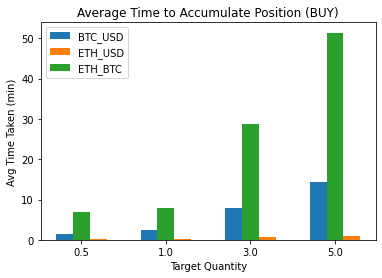

Figure 1: The average time taken to buy a position size of the target quantity, averaged over every day there were trades.


In [290]:
grouped_df_BTC_USD = results_df_BTC_USD.copy()
one_minute = np.timedelta64(1000000000, 'ns') * 60

grouped_df_ETH_USD = results_df_ETH_USD.copy()
grouped_df_BTC_ETH = results_df_BTC_ETH.copy()


X = list(grouped_df_BTC_USD['Quantity'].unique())
acc_BTC_USD = list(grouped_df_BTC_USD.groupby('Quantity')['Time Taken'].mean() / one_minute)
acc_ETH_USD = list(grouped_df_ETH_USD.groupby('Quantity')['Time Taken'].mean() / one_minute)
acc_BTC_ETH = list(grouped_df_BTC_ETH.groupby('Quantity')['Time Taken'].mean() / one_minute)
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, acc_BTC_USD, 0.2, label = 'BTC_USD')
plt.bar(X_axis + 0.2, acc_ETH_USD, 0.2, label = 'ETH_USD')
plt.bar(X_axis , acc_BTC_ETH, 0.2, label = 'ETH_BTC')
  
plt.xticks(X_axis, X)
plt.xlabel("Target Quantity")
plt.ylabel("Avg Time Taken (min)")
plt.title("Average Time to Accumulate Position (BUY)")
plt.legend()
plt.show()
print('Figure 1: The average time taken to buy a position size of the target quantity, averaged over every day there were trades.')

In the Figure 1, we can see that it takes much longer to enter an ETH-BTC position than it does either of the crytpos to US Dollars. This is not entirely a surprise, given the volumes traded between cryptos and traditional currencies is much higher than volumes traded between crypto assets. We anticipate similar results when selling, but let's double check.

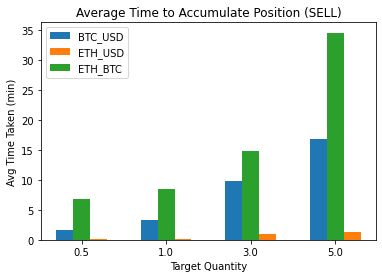

Figure 2: The average time taken to sell a position size of the target quantity, averaged over every day there were trades.


In [291]:
results_df_BTC_USD_sell = pd.DataFrame(columns=['Date', 'Total Spent', 'Transaction Fees', 'Time Taken', 'Quantity', 'Arrival Price'])
results_df_BTC_USD_sell = test_quantities(.5, results_df_BTC_USD_sell, currencies=TradingPair.BTC_USD, side="SELL")
results_df_BTC_USD_sell = test_quantities(1, results_df_BTC_USD_sell, currencies=TradingPair.BTC_USD, side="SELL")
results_df_BTC_USD_sell = test_quantities(3, results_df_BTC_USD_sell, currencies=TradingPair.BTC_USD, side="SELL")
results_df_BTC_USD_sell = test_quantities(5, results_df_BTC_USD_sell, currencies=TradingPair.BTC_USD, side="SELL")

results_df_ETH_USD_sell = pd.DataFrame(columns=['Date', 'Total Spent', 'Transaction Fees', 'Time Taken', 'Quantity', 'Arrival Price'])
results_df_ETH_USD_sell = test_quantities(.5, results_df_ETH_USD_sell, currencies=TradingPair.ETH_USD, side="SELL")
results_df_ETH_USD_sell = test_quantities(1, results_df_ETH_USD_sell, currencies=TradingPair.ETH_USD, side="SELL")
results_df_ETH_USD_sell = test_quantities(3, results_df_ETH_USD_sell, currencies=TradingPair.ETH_USD, side="SELL")
results_df_ETH_USD_sell = test_quantities(5, results_df_ETH_USD_sell, currencies=TradingPair.ETH_USD, side="SELL")

results_df_BTC_ETH_sell = pd.DataFrame(columns=['Date', 'Total Spent', 'Transaction Fees', 'Time Taken', 'Quantity', 'Arrival Price'])
results_df_BTC_ETH_sell = test_quantities(.5, results_df_BTC_ETH_sell, currencies=TradingPair.ETH_BTC, side="SELL")
results_df_BTC_ETH_sell = test_quantities(1, results_df_BTC_ETH_sell, currencies=TradingPair.ETH_BTC, side="SELL")
results_df_BTC_ETH_sell = test_quantities(3, results_df_BTC_ETH_sell, currencies=TradingPair.ETH_BTC, side="SELL")
results_df_BTC_ETH_sell = test_quantities(5, results_df_BTC_ETH_sell, currencies=TradingPair.ETH_BTC, side="SELL")

grouped_df_BTC_USD_sell = results_df_BTC_USD_sell.copy()
one_minute = np.timedelta64(1000000000, 'ns') * 60

grouped_df_ETH_USD_sell = results_df_ETH_USD_sell.copy()
grouped_df_BTC_ETH_sell = results_df_BTC_ETH_sell.copy()


X = list(grouped_df_BTC_USD_sell['Quantity'].unique())
acc_BTC_USD = list(grouped_df_BTC_USD_sell.groupby('Quantity')['Time Taken'].mean() / one_minute)
acc_ETH_USD = list(grouped_df_ETH_USD_sell.groupby('Quantity')['Time Taken'].mean() / one_minute)
acc_BTC_ETH = list(grouped_df_BTC_ETH_sell.groupby('Quantity')['Time Taken'].mean() / one_minute)
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, acc_BTC_USD, 0.2, label = 'BTC_USD')
plt.bar(X_axis + 0.2, acc_ETH_USD, 0.2, label = 'ETH_USD')
plt.bar(X_axis , acc_BTC_ETH, 0.2, label = 'ETH_BTC')
  
plt.xticks(X_axis, X)
plt.xlabel("Target Quantity")
plt.ylabel("Avg Time Taken (min)")
plt.title("Average Time to Accumulate Position (SELL)")
plt.legend()
plt.show()
print('Figure 2: The average time taken to sell a position size of the target quantity, averaged over every day there were trades.')

As before, Figure 2 shows it takes (on average) much longer to enter a position between cryptos than it does between a cryptocurrency and a traditional currency. What is interesting is how much less time it takes to enter into a sizable Sell position between crytocurrencies. When buying, we see that it took roughly 50 min to buy Etherium with Bitcoin, but only 35 min to sell the same quantity: 5.0. This would imply that over the course of the three years, there is much more selling happening of Etherium volume wise than buying. This could possibly be due to a decline in popularity of Etherium, or an overall statement on the lack of liquidity in the ETH BTC market.

### Average Price vs. Arrival Price

Next let's compare the average price of the currencies accumulated to the arrival price. In other words, what we end up paying in a VWAP strategy vs. what we would pay by entering the market all at once (theoretically anyway. In actuality we would likely cross several levels of the bids/ask if we put in this large of an order).

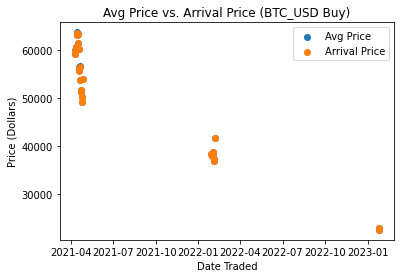

Figure 3: A comparison of the average price paid when using a VWAP strategy vs. the Arrival Price at the time trading started


In [292]:
grouped_df_BTC_USD = results_df_BTC_USD.copy()
x = list(grouped_df_BTC_USD['Date'].unique())
quantity_1 = grouped_df_BTC_USD[grouped_df_BTC_USD['Quantity'] == 0.5]
y1 = ((quantity_1['Total Spent'] - quantity_1['Transaction Fees']) / quantity_1['Quantity']).values
y2 = (quantity_1['Arrival Price']).values

plt.scatter(x, y1, label='Avg Price')
plt.scatter(x, y2, label='Arrival Price')
plt.xlabel("Date Traded")
plt.ylabel("Price (Dollars)")
plt.title("Avg Price vs. Arrival Price (BTC_USD Buy)")
plt.legend()
plt.show()
print('Figure 3: A comparison of the average price paid when using a VWAP strategy vs. the Arrival Price at the time trading started')

The data appears to be fairly tightly coupled, but it is difficult to tell for sure in a plot of this format. Let's narrow it down to just days in 2021.

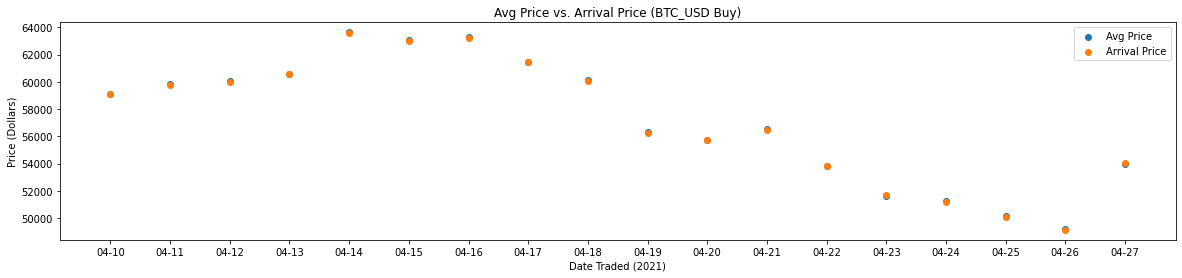

Figure 4: A comparison of the average price paid when using a VWAP strategy vs. the Arrival Price at the time trading started, in 2021


In [293]:
quantity_1_2021 = quantity_1.copy()
quantity_1_2021 = quantity_1_2021[pd.to_datetime(quantity_1_2021['Date'], format='%Y-%m-%d').dt.year == 2021]
quantity_1_2021['date2'] = pd.to_datetime(quantity_1_2021['Date'], format='%Y-%m-%d')
quantity_1_2021['date3'] = quantity_1_2021['date2'].apply(lambda x: x.strftime('%m-%d'))
# display(quantity_1_2021)
x = list(quantity_1_2021['date3'].unique())
y1 = ((quantity_1_2021['Total Spent'] - quantity_1_2021['Transaction Fees']) / quantity_1_2021['Quantity']).values
y2 = (quantity_1_2021['Arrival Price']).values
f = plt.figure()
f.set_figwidth(20)
plt.scatter(x, y1, label='Avg Price')
plt.scatter(x, y2, label='Arrival Price')

# plt.xticks(X_axis, X)
plt.xlabel("Date Traded (2021)")
plt.ylabel("Price (Dollars)")
plt.title("Avg Price vs. Arrival Price (BTC_USD Buy)")
plt.legend()
plt.show()
print('Figure 4: A comparison of the average price paid when using a VWAP strategy vs. the Arrival Price at the time trading started, in 2021')

These are still very tightly grouped, not a complete surprise given the scale of the y-axis. Since this is still difficult to read, let's calculate difference between the prices and graph that instead

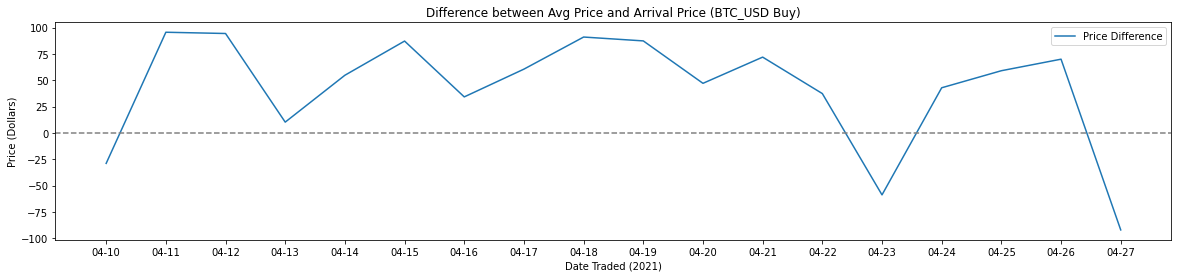

Figure 5: A comparison of the average price paid when using a VWAP strategy vs. the Arrival Price at the time trading started, in 2021
The average price difference between the Average Price and the Arrival Price is $42.48


In [304]:
# display(quantity_1_2021)
x = list(quantity_1_2021['date3'].unique())
y1 = ((quantity_1_2021['Total Spent'] - quantity_1_2021['Transaction Fees']) / quantity_1_2021['Quantity']).values
y2 = (quantity_1_2021['Arrival Price']).values
f = plt.figure()
f.set_figwidth(20)
plt.plot(x, y1-y2, label='Price Difference')
plt.axhline(y=0, linestyle='--', color='grey')
# plt.scatter(x, y2, label='Arrival Price')

# plt.xticks(X_axis, X)
plt.xlabel("Date Traded (2021)")
plt.ylabel("Price (Dollars)")
plt.title("Difference between Avg Price and Arrival Price (BTC_USD Buy)")
plt.legend()
plt.show()
print('Figure 5: A comparison of the average price paid when using a VWAP strategy vs. the Arrival Price at the time trading started, in 2021')
print(f'The average price difference between the Average Price and the Arrival Price is ${round((y1-y2).mean(),2)}')

The fact that the (average) price difference between the average price and the arrival price is a positive $42 seems to imply that during the month of April 2021, when buying BTC-USD, using a VWAP strategy costs us more to implement than if we had been able to trade exactly at the arrival price. However, that is a small difference when compared to the overall positions entered of $50,000 - $60,000 (well under 0.1%). This could be due to several factors. The price of the currency may actually have risen during the time frames specified, or it could be that as the market saw more liquidity on the Buy side, prices rose accordingly, and we were merely pulled into the trend due to the VWAP strategy. 

Now let's analyze other currencies/years.

In [295]:
results_df_BTC_USD['Average Price'] = (results_df_BTC_USD['Total Spent'] - results_df_BTC_USD['Transaction Fees']) / results_df_BTC_USD['Quantity']
results_df_BTC_USD['Diff'] = results_df_BTC_USD['Average Price'] - results_df_BTC_USD['Arrival Price']
results_df_BTC_USD_sell['Average Price'] = (results_df_BTC_USD_sell['Total Spent'] - results_df_BTC_USD_sell['Transaction Fees']) / results_df_BTC_USD_sell['Quantity']
results_df_BTC_USD_sell['Diff'] = results_df_BTC_USD_sell['Average Price'] - results_df_BTC_USD_sell['Arrival Price']
results_df_ETH_USD['Average Price'] = (results_df_ETH_USD['Total Spent'] - results_df_ETH_USD['Transaction Fees']) / results_df_ETH_USD['Quantity']
results_df_ETH_USD['Diff'] = results_df_ETH_USD['Average Price'] - results_df_ETH_USD['Arrival Price']
results_df_ETH_USD_sell['Average Price'] = (results_df_ETH_USD_sell['Total Spent'] - results_df_ETH_USD_sell['Transaction Fees']) / results_df_ETH_USD_sell['Quantity']
results_df_ETH_USD_sell['Diff'] = results_df_ETH_USD_sell['Average Price'] - results_df_ETH_USD_sell['Arrival Price']
results_df_BTC_ETH['Average Price'] = (results_df_BTC_ETH['Total Spent'] - results_df_BTC_ETH['Transaction Fees']) / results_df_BTC_ETH['Quantity']
results_df_BTC_ETH['Diff'] = results_df_BTC_ETH['Average Price'] - results_df_BTC_ETH['Arrival Price']
results_df_BTC_ETH_sell['Average Price'] = (results_df_BTC_ETH_sell['Total Spent'] - results_df_BTC_ETH_sell['Transaction Fees']) / results_df_BTC_ETH_sell['Quantity']
results_df_BTC_ETH_sell['Diff'] = (results_df_BTC_ETH_sell['Average Price'] - results_df_BTC_ETH_sell['Arrival Price'])


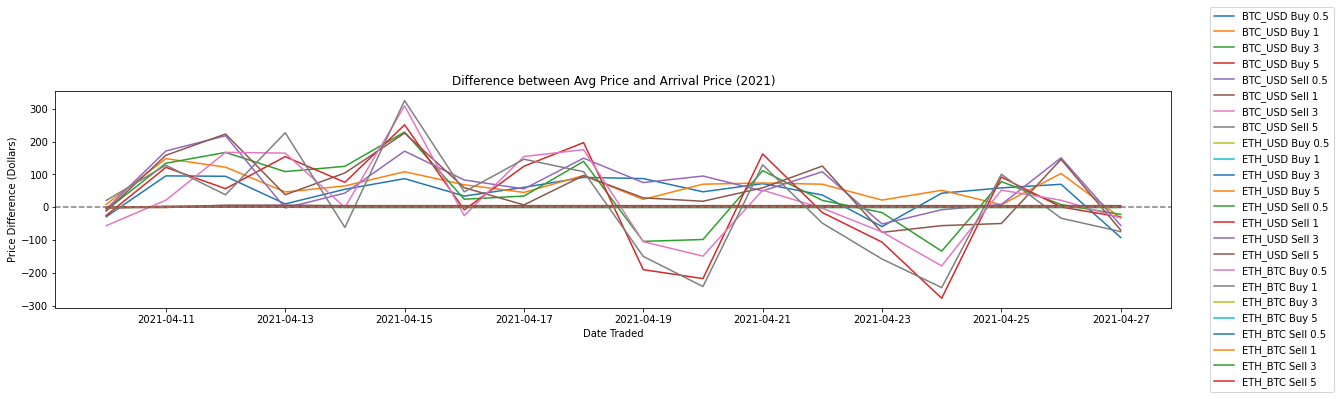

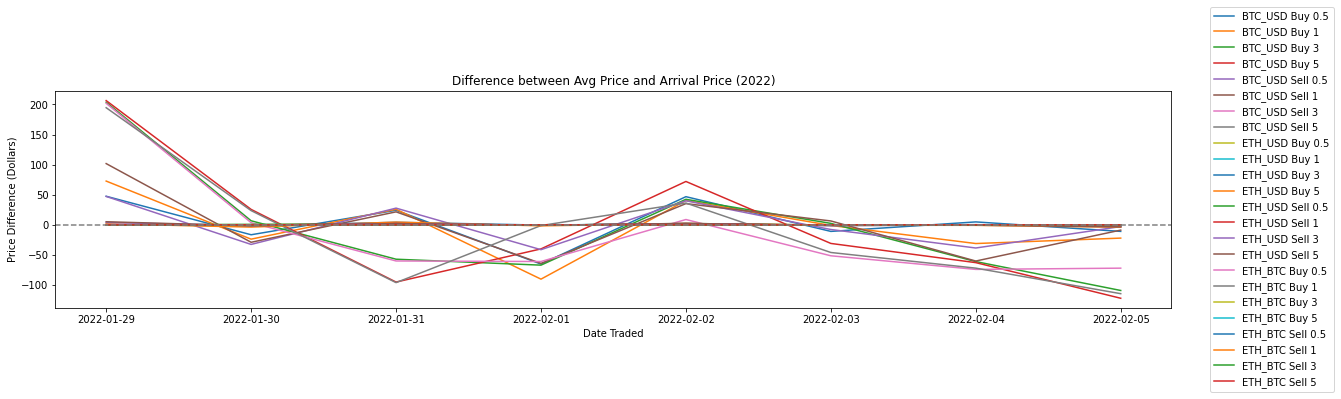

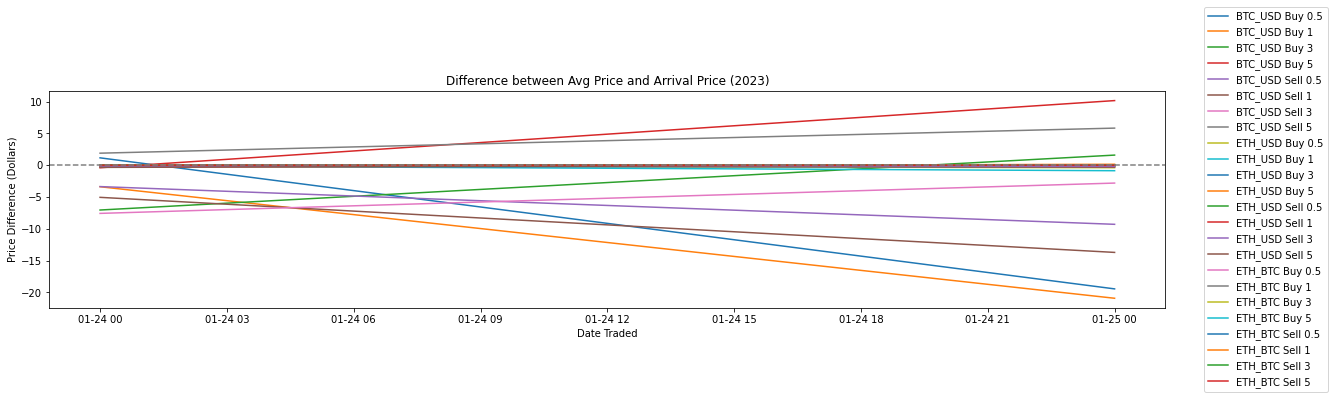

In [296]:
quantities_to_test = [0.5, 1, 3, 5]
years = [2021, 2022, 2023]
x = list(grouped_df_BTC_USD['Date'].unique())
frames = [results_df_BTC_USD, results_df_BTC_USD_sell, results_df_ETH_USD, results_df_ETH_USD_sell, results_df_BTC_ETH, results_df_BTC_ETH_sell]
names = ['BTC_USD Buy', 'BTC_USD Sell', 'ETH_USD Buy', 'ETH_USD Sell', 'ETH_BTC Buy', 'ETH_BTC Sell']
for year in years:
    f = plt.figure()
    f.set_figwidth(20)
    index = 0
    for frame in frames:
        frame = frame[pd.to_datetime(frame['Date'], format='%Y-%m-%d').dt.year == year]
        x = list(frame['Date'].unique())
        for quantity in quantities_to_test:
            diffs = frame[frame['Quantity']==quantity]['Diff']
            plt.plot(x, diffs, label=f'{names[index]} {quantity}')
        index += 1

    plt.axhline(y=0, linestyle='--', color='grey')
    plt.xlabel(f"Date Traded")
    plt.ylabel("Price Difference (Dollars)")
    plt.title(f"Difference between Avg Price and Arrival Price ({year})")
    plt.legend(loc='right', bbox_to_anchor=(1.15, 0.5))
plt.show()    


We can see that the differences between the average price and arrival price seems fairly correlated. Though it is hard to tell with as many lines as we have, we notice that in 2021 the larger quantity trades had a larger price difference. This is expected, as the notional traded here is much larger (and therefore the price difference is as well). This is rather difficult to verify looking at just these graphs however, so next I will focus on only 2021, and see if all the currencies price differences are correlated, or if one potentially moves counter to the others.

In [297]:
data_for_correlation = None
index = 0
for frame in frames:
    frame = frame[pd.to_datetime(frame['Date'], format='%Y-%m-%d').dt.year == 2021]
    x = list(frame['Date'].unique())
    if data_for_correlation is None:
        data_for_correlation = pd.DataFrame(index=x)
    for quantity in quantities_to_test:
        diffs = frame[frame['Quantity']==quantity]['Diff']
        data_for_correlation[f'{names[index]}'] = diffs.values
        # plt.plot(x, diffs)
    index += 1
        
display(data_for_correlation)

,BTC_USD Buy,BTC_USD Sell,ETH_USD Buy,ETH_USD Sell,ETH_BTC Buy,ETH_BTC Sell
2021-04-10,-24.993188,20.809036,-1.892948,-0.771390,0.000024,0.000058
2021-04-11,121.523134,127.949810,3.581003,0.881851,-0.000104,-0.000089
2021-04-12,56.673591,38.064704,2.379799,5.951274,-0.000005,0.000015
2021-04-13,154.298861,226.914675,0.163256,6.160429,0.000150,0.000136
2021-04-14,75.930633,-61.283480,1.577339,5.092366,0.000150,0.000136
2021-04-15,251.060823,324.756940,1.577339,5.092366,0.000150,0.000136
2021-04-16,-7.898166,47.046777,1.577339,5.092366,0.000150,0.000136
2021-04-17,124.922561,146.297352,1.577339,5.092366,0.000150,0.000136
2021-04-18,196.827336,108.391864,1.577339,5.092366,0.000150,0.000136
2021-04-19,-189.810087,-149.491967,1.577339,5.092366,0.000150,0.000136


<AxesSubplot: >

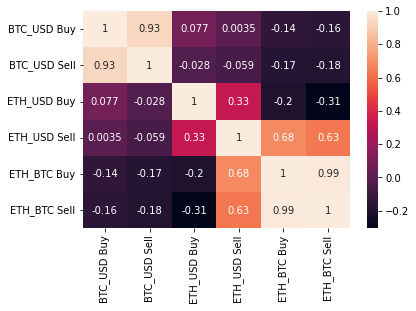

In [298]:
import seaborn as sns
sns.heatmap(data_for_correlation.corr(),annot=True)

This correlation heat map is interesting, especially the negative correlation between the ETH_USD Buy and the ETH_BTC Buy. This would imply that if the price difference for buying Etherium in US dollars was going up, then the price difference for Etherium in Bitcoin was going down. This could be useful to us if we want to get into a large, long position on Etherium, as we could potentially hedge ourselves against big price spreads by splitting our position over the two pairs so that we filled part of it with US Dollars and another portion with Bitcoin. We could then potentially enter the market at something closer to the market price with less risk on the price differences spreading over the course of the VWAP Accumulation.

### Transaction Costs

Now let's compare transaction costs. We would expect, since the transaction cost is always a set percentage of traded value, that we would have higher transaction costs when the VWAP is higher, and lower transaction costs when the VWAP is lower.

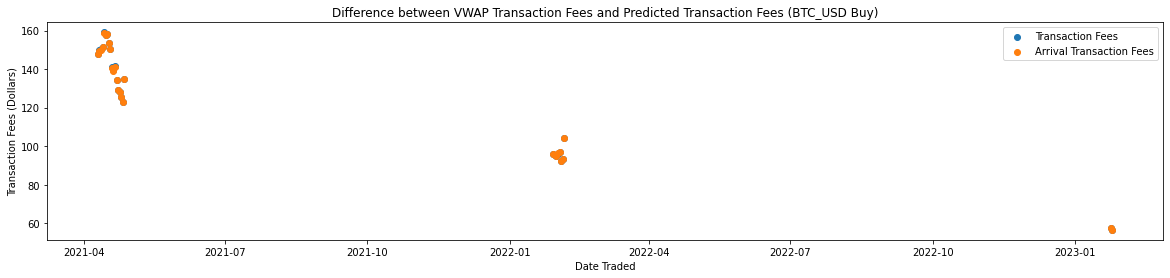

Figure 6: A comparison of the transaction fees in the VWAP Accumulation vs. the Transaction Fees that would occur if you entered the entire target quantity at the arrival price


In [303]:
# display(quantity_1)
x = list(quantity_1['Date'].unique())
y1 = (quantity_1['Transaction Fees']).values
y2 = (quantity_1['Arrival Price'] * quantity_1['Quantity'] * 0.005).values
f = plt.figure()
f.set_figwidth(20)
plt.scatter(x, y1, label='Transaction Fees')
plt.scatter(x, y2, label='Arrival Transaction Fees')
plt.xlabel("Date Traded")
plt.ylabel("Transaction Fees (Dollars)")
plt.title("Difference between VWAP Transaction Fees and Predicted Transaction Fees (BTC_USD Buy)")
plt.legend()
plt.show()
print('Figure 6: A comparison of the transaction fees in the VWAP Accumulation vs. the Transaction Fees that would occur if you entered the entire target quantity at the arrival price')


We will follow the same strategy as above when comparing prices, and focus only on 2021 and the differences.

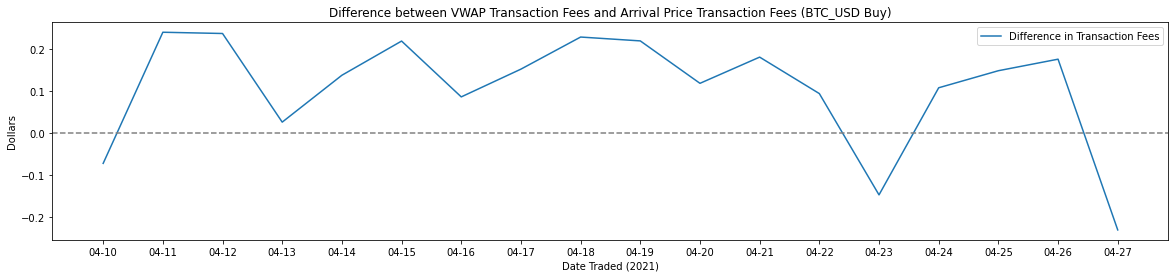

Figure 7: A comparison of the average transaction fees when using a VWAP strategy vs. the transaction fee of trading at the arrival price (2021)
The average price difference between the VWAP Transaction Fees and the Arrival Price Transaction Fees is $-0.11


In [308]:
# display(quantity_1_2021)
x = list(quantity_1_2021['date3'].unique())
y1 = (quantity_1_2021['Arrival Price'] * quantity_1_2021['Quantity'] * 0.005).values
y2 = (quantity_1_2021['Transaction Fees']).values
f = plt.figure()
f.set_figwidth(20)
plt.plot(x, y2-y1, label='Difference in Transaction Fees')
plt.axhline(y=0, linestyle='--', color='grey')
plt.xlabel("Date Traded (2021)")
plt.ylabel("Dollars")
plt.title("Difference between VWAP Transaction Fees and Arrival Price Transaction Fees (BTC_USD Buy)")
plt.legend()
plt.show()
print('Figure 7: A comparison of the average transaction fees when using a VWAP strategy vs. the transaction fee of trading at the arrival price (2021)')
print(f'The average price difference between the VWAP Transaction Fees and the Arrival Price Transaction Fees is ${round((y1-y2).mean(),2)}')

It is not a surprise that Figure 7 mirrors Figure 5 very closely, as the transaction fees should just be a scaling of the prices.

## Conclusion

When trading crytocurrencies, the VWAP Accumulation Algorithm seems to be a fairly reasonable strategy to accumulate a large position, on either side of the book. It generally costs more to enter into the accumulated position (as seen in the average difference in VWAP prices vs arrival prices), however this additional required capital is a very small percentage of overall notional. In fact it was less than 0.1% of the notional in the particular example analyzed in this case. The transactional costs are also higher as a result of the slightly higher prices, but again, at a very very small scale. These additional costs may be worth paying to enter into the market without completely upsetting the bid-ask spread. 

Further areas of investigation for this strategy would be to get more data beyond the several weeks of data given here. Given the relatively small windows of data analyzed, it's possible that market trends may have influenced the results of our analysis, and that if we entered a period with more volatility or less liquidity, we might see this algorithm perform poorly. Costs may rise or it might take an unreasonably long time to enter into the positions we want. We saw this a bit with the Etherium Bitcoin trades in this analysis, when selling 5 Etherium took on average almost 50 minutes (Figure 1). Finally, a last area of investigation would be analyzing the participation rates. I kept my participation rate steady at 5% throughout all my trading simulations, but trades would obviously be completed much more quickly at higher participation. It would be interesting to see how prices reacted when increasing (or decreasing) the participation rate of the simulation.